<a href="https://colab.research.google.com/github/israelguadarrama44/analisis_inpc_colab/blob/main/analisis_inpc_mensual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()

Saving conjunto_de_datos_inpc_mensual.csv to conjunto_de_datos_inpc_mensual (1).csv


--- DataFrame Cargado (Primeras 5 Filas) ---
  COBERTURA PERIODICIDAD       FECHA  \
0  Nacional      Mensual  2021-02-01   
1  Nacional      Mensual  2021-02-01   
2  Nacional      Mensual  2021-02-01   
3  Nacional      Mensual  2021-02-01   
4  Nacional      Mensual  2021-02-01   

                                            CONCEPTO    VALOR UNIDAD_MEDIDA  \
0  Índice nacional de precios al consumidor (mens...  110.907        Índice   
1  Índice nacional de precios al consumidor (mens...  110.061        Índice   
2  Índice nacional de precios al consumidor (mens...  112.216        Índice   
3  Índice nacional de precios al consumidor (mens...  107.734        Índice   
4  Índice nacional de precios al consumidor (mens...  113.524        Índice   

              ESTATUS  
0  Cifras definitivas  
1  Cifras definitivas  
2  Cifras definitivas  
3  Cifras definitivas  
4  Cifras definitivas  




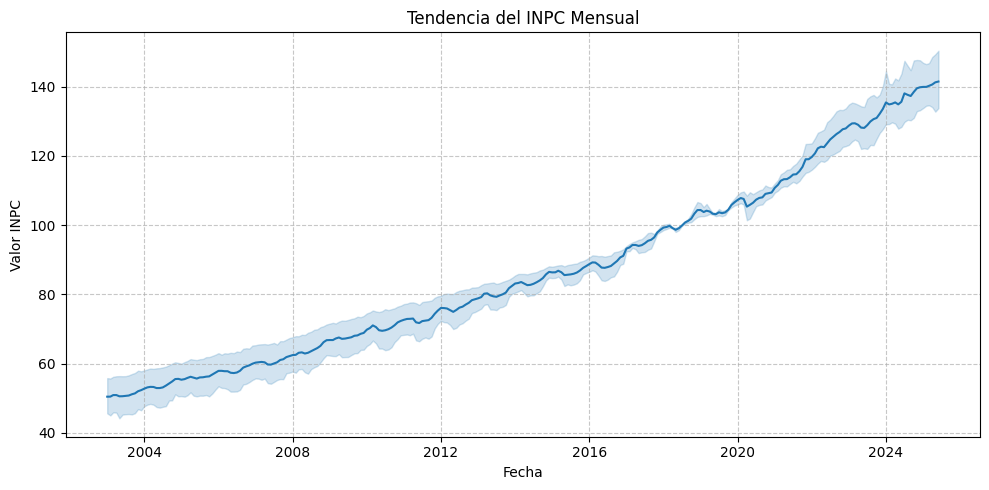

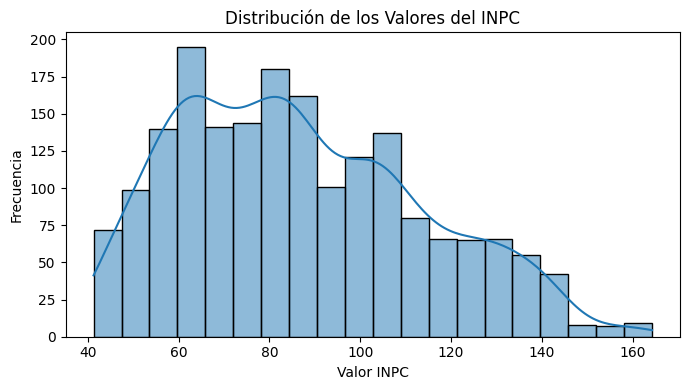

Demasiados conceptos para una visualización clara por grupo, o solo un concepto.

--- Análisis Exploratorio Completo ---
El dataset contiene 1890 registros y abarca desde 2003-01 hasta 2025-06.
El valor promedio del INPC es: 86.86
El valor mínimo del INPC es: 41.28
El valor máximo del INPC es: 164.29


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga del Archivo CSV ---
# Asegúrate de que 'conjunto_de_datos_inpc_mensual.csv' ya esté subido a tu sesión de Colab
df = pd.read_csv('conjunto_de_datos_inpc_mensual.csv')

print("--- DataFrame Cargado (Primeras 5 Filas) ---")
print(df.head())
print("\n")

# --- 2. Preparación y Limpieza de Datos ---
# Convertir 'FECHA' a formato de fecha y manejar posibles errores
df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
df.dropna(subset=['FECHA'], inplace=True) # Eliminar filas con fechas no válidas
df.sort_values('FECHA', inplace=True) # Ordenar por fecha para series de tiempo

# --- 3. Visualización Minimalista ---

# Gráfico de Tendencia del Valor (INPC) a lo largo del tiempo
plt.figure(figsize=(10, 5))
sns.lineplot(x='FECHA', y='VALOR', data=df)
plt.title('Tendencia del INPC Mensual')
plt.xlabel('Fecha')
plt.ylabel('Valor INPC')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Histograma de la Distribución del Valor (INPC)
plt.figure(figsize=(7, 4))
sns.histplot(df['VALOR'], kde=True, bins=20)
plt.title('Distribución de los Valores del INPC')
plt.xlabel('Valor INPC')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Opcional: Tendencia del Valor por Concepto (si hay pocos conceptos)
if df['CONCEPTO'].nunique() > 1 and df['CONCEPTO'].nunique() < 6: # Limitar a pocos conceptos para claridad
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='FECHA', y='VALOR', hue='CONCEPTO', data=df)
    plt.title('Tendencia del INPC por Concepto')
    plt.xlabel('Fecha')
    plt.ylabel('Valor INPC')
    plt.legend(title='Concepto')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("Demasiados conceptos para una visualización clara por grupo, o solo un concepto.")

print("\n--- Análisis Exploratorio Completo ---")
print(f"El dataset contiene {df.shape[0]} registros y abarca desde {df['FECHA'].min().strftime('%Y-%m')} hasta {df['FECHA'].max().strftime('%Y-%m')}.")
print(f"El valor promedio del INPC es: {df['VALOR'].mean():.2f}")
print(f"El valor mínimo del INPC es: {df['VALOR'].min():.2f}")
print(f"El valor máximo del INPC es: {df['VALOR'].max():.2f}")